In [4]:
%%bash

cd /App/mininettest/ && python /App/mininettest/demo.py --scheduler random --rtt 0
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $(bc <<< "scale=2; $time") 

40646.77


*** Error setting resource limits. Mininet's performance may be affected.


## Testing Phase

In [ ]:
%%bash
rm /App/logs/client.logs
echo RR > /App/output/random.csv
for i in $(seq 1 30)
do
cd /App/mininettest/ && python /App/mininettest/demo.py --scheduler random --rtt 0
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $time >> /App/output/random.csv
done

In [ ]:
%%bash
rm /App/logs/client.logs
echo minRTT > /App/output/rtt.csv
for i in $(seq 1 30)
do
cd /App/mininettest/ && python /App/mininettest/demo.py --scheduler rtt --rtt 0
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $time >> /App/output/rtt.csv
done

In [ ]:
%%bash
rm /App/logs/client.logs
echo ECF > /App/output/ecf.csv
for i in $(seq 1 30)
do
cd /App/mininettest/ && python /App/mininettest/demo.py --scheduler ecf --rtt 0
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $time >> /App/output/ecf.csv
done

In [ ]:
%%bash
rm /App/logs/client.logs
echo BLEST > /App/output/blest.csv
for i in $(seq 1 30)
do
cd /App/mininettest/ && python /App/mininettest/demo.py --scheduler blest --rtt 0
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $time >> /App/output/blest.csv
done

In [ ]:
%%bash
rm /App/logs/client.logs
echo Peekaboo > /App/output/peekaboo.csv
for i in $(seq 1 30)
do
cd /App/mininettest/ && python /App/mininettest/demo.py --scheduler peek --rtt 0
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $time >> /App/output/peekaboo.csv
done

          1091       51671           0
0   434.271874  453.238516  488.150308
1   471.380898  410.833193  446.967829
2   471.589647  438.075983  483.812754
3   438.839682  435.952490  447.315560
4   439.324781  429.407502  468.740917
5   449.379670  417.444521  485.506205
6   409.198922  440.014064  427.197541
7   474.287381  415.110489  506.308822
8   428.236823  428.926592  427.116910
9   424.495530  435.809361  488.519849
10  432.037969  415.471403  435.957200
11  437.200076  444.430972  488.945293
12  433.142973  444.516063  450.548196
13  438.236781  450.495536  459.208608
14  420.086741  466.045296  503.012617
15  448.544177  453.561176  441.515699
16  418.770316  428.972216  491.440193
17  426.645355  429.159216  442.437941
18  489.837413  440.542029  439.528978
19  435.609987  425.897913  453.364277
20  442.384437  468.396638  431.669119
21  422.554074  425.876471  467.143138
22  434.222844  457.862645  448.973382
23  437.511493  435.754004  481.910711
24  443.367810  453.74312

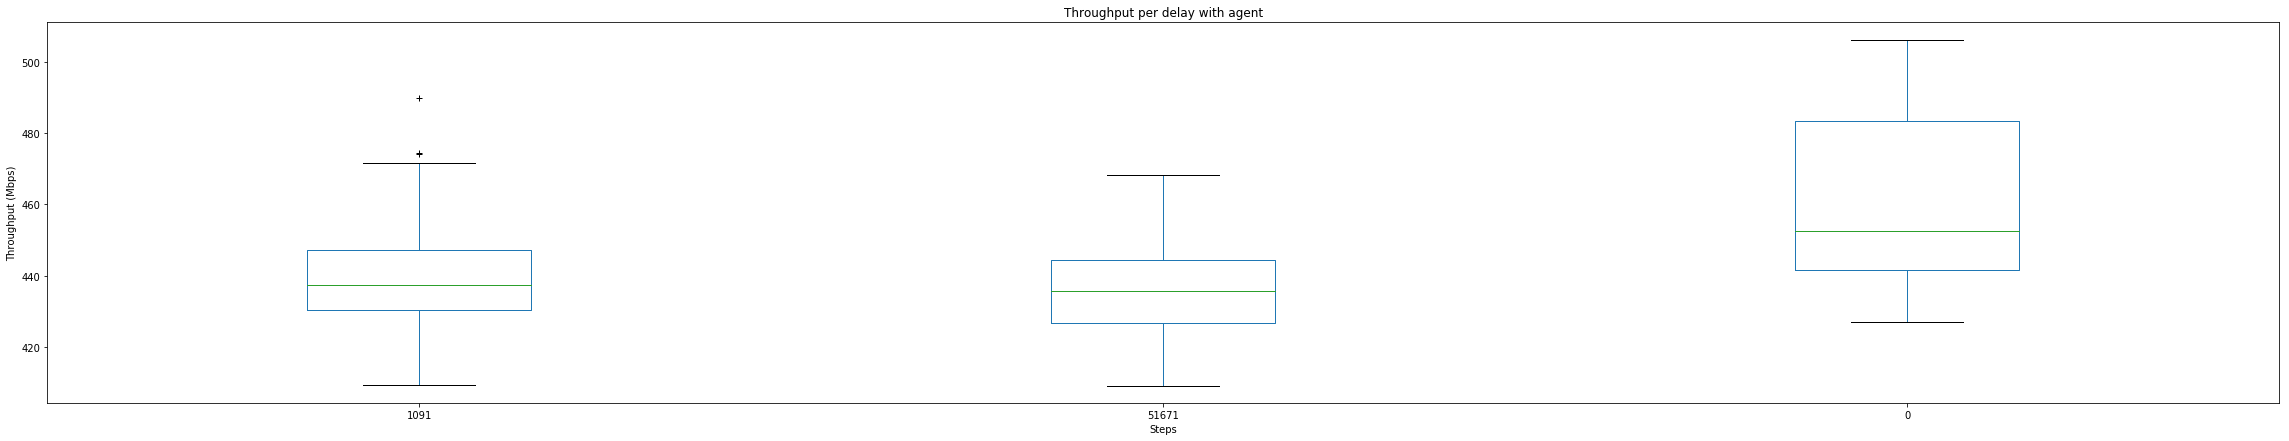

In [17]:
import pandas

random = pandas.read_csv("/App/output/random.csv")
rtt = pandas.read_csv("/App/output/rtt.csv")
ecf = pandas.read_csv("/App/output/ecf.csv")
blest = pandas.read_csv("/App/output/blest.csv")
peekaboo = pandas.read_csv("/App/output/peekaboo.csv")
result = pandas.concat([(random), (rtt), (ecf), (blest), (peekaboo)], axis=1)

import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
figsize(40, 7)

result.plot.box(sym='+')

plt.ylabel("Completion Time (ms)")
plt.ylim(top=4000)
plt.xlabel("Schedulers")
plt.title("Completion time of different schedulers")
